In [1]:
import pandas as pd
import numpy as np
import os as os
import warnings
import seaborn as sns
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")

In [2]:
# If CSV file

#data = pd.read_csv(r"C:\Users\Monisha\Study Material\Kaggle_Feb\Data\ecommerce-data\data.csv", 
#                  encoding= 'unicode_escape')
#
# If excel - Replace path 

#data = pd.read_excel(r"C:\Users\Monisha\Study Material\Kaggle_Feb\Data\ecommerce-data\Online Retail.xlsx")


##This is Industrial way.##
filepath = r"C:\Users\Bhagyashree\Desktop\JupyterPractice\Data"
filename = "Online Retail.xlsx"

data = pd.read_excel(os.path.join(filepath, filename)) # encoding = unicode_escape

In [3]:
data.head(2) # Top 2 rows - to see whether excel data visible in Python

InvoiceNo StockCode                         Description  Quantity  \
0    536365    85123A  WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                 WHITE METAL LANTERN         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom

In [4]:
data.shape # no of rows & columns

(541909, 8)

In [5]:
print("No of rows: ",data.shape[0])
print("No of columns: ",data.shape[1])

No of rows:  541909
No of columns:  8


In [6]:
print("No of countries: ",data["Country"].nunique())

No of countries:  38


In [7]:
print("Names of countries: ",data["Country"].unique())

Names of countries:  ['United Kingdom' 'France' 'Australia' 'Netherlands' 'Germany' 'Norway'
 'EIRE' 'Switzerland' 'Spain' 'Poland' 'Portugal' 'Italy' 'Belgium'
 'Lithuania' 'Japan' 'Iceland' 'Channel Islands' 'Denmark' 'Cyprus'
 'Sweden' 'Austria' 'Israel' 'Finland' 'Bahrain' 'Greece' 'Hong Kong'
 'Singapore' 'Lebanon' 'United Arab Emirates' 'Saudi Arabia'
 'Czech Republic' 'Canada' 'Unspecified' 'Brazil' 'USA'
 'European Community' 'Malta' 'RSA']


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null datetime64[ns]
UnitPrice      541909 non-null float64
CustomerID     406829 non-null float64
Country        541909 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [9]:
data["Quantity"].dtype

dtype('int64')

### Points Learnt: 
1. Load csv/excel file in python using pandas pacakge 
2. How to look at top and bottom rows (head & tail)
3. How to get dimension of data (Number of rows and columns)
4. Get datatypes for all columns and for a particular column

In [10]:
missing_df = pd.DataFrame(data.isnull().sum(), columns = ["missing rows"])  # Finding missing i.e. null values
                                                                            # isnull - checks for null
                                                                            # sum - sums up null values
                                                                            # pd.DataFrame - creates Dataframe

missing_df["missing %"] = missing_df["missing rows"]*100/data.shape[0]      # Finding % of missing values
missing_df["missing %"] = missing_df["missing %"].round(2)                  # Round off
missing_df

missing rows  missing %
InvoiceNo               0       0.00
StockCode               0       0.00
Description          1454       0.27
Quantity                0       0.00
InvoiceDate             0       0.00
UnitPrice               0       0.00
CustomerID         135080      24.93
Country                 0       0.00

In [11]:
missing_df = missing_df.sort_values("missing %", ascending = True)   # Ascending order
missing_df

missing rows  missing %
InvoiceNo               0       0.00
StockCode               0       0.00
Quantity                0       0.00
InvoiceDate             0       0.00
UnitPrice               0       0.00
Country                 0       0.00
Description          1454       0.27
CustomerID         135080      24.93

In [12]:
missing_df = missing_df.sort_values("missing %", ascending = False)  # Descending order
missing_df

missing rows  missing %
CustomerID         135080      24.93
Description          1454       0.27
InvoiceNo               0       0.00
StockCode               0       0.00
Quantity                0       0.00
InvoiceDate             0       0.00
UnitPrice               0       0.00
Country                 0       0.00

In [13]:
data[data["CustomerID"].isnull()].head()  # Python - Blanks (NaN, NaT) in Customer ID

InvoiceNo StockCode                      Description  Quantity  \
622     536414     22139                              NaN        56   
1443    536544     21773  DECORATIVE ROSE BATHROOM BOTTLE         1   
1444    536544     21774  DECORATIVE CATS BATHROOM BOTTLE         2   
1445    536544     21786               POLKADOT RAIN HAT          4   
1446    536544     21787            RAIN PONCHO RETROSPOT         2   

             InvoiceDate  UnitPrice  CustomerID         Country  
622  2010-12-01 11:52:00       0.00         NaN  United Kingdom  
1443 2010-12-01 14:32:00       2.51         NaN  United Kingdom  
1444 2010-12-01 14:32:00       2.51         NaN  United Kingdom  
1445 2010-12-01 14:32:00       0.85         NaN  United Kingdom  
1446 2010-12-01 14:32:00       1.66         NaN  United Kingdom

In [14]:
data_2 = data.copy()

# My try:
#data_2 = data_2.dropna(axis=0, how='any', subset = ["CustomerID"])
data_2 = data_2.dropna(subset = ["CustomerID"])   # data_2.dropna() - all columns (classroom)

"""
Both my try and classroom give same result.
axis=0 and how='any' are default values - so they produce same data_2.shape result.
"""

data_2.shape

data_2.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

## Points Learnt: 
1. Check for missing data for each column in numbers and percentage
2. How to create a dataframe 
3. How to sort any column in any order?
4. How to look at missing values in dataframe
5. How to drop the missing rows using column name

In [15]:
duplicate_df = data_2[data_2.duplicated(keep = False)]   # Getting duplicates in table
duplicate_df.head()

InvoiceNo StockCode                       Description  Quantity  \
485    536409     22111      SCOTTIE DOG HOT WATER BOTTLE         1   
489    536409     22866     HAND WARMER SCOTTY DOG DESIGN         1   
494    536409     21866       UNION JACK FLAG LUGGAGE TAG         1   
517    536409     21866       UNION JACK FLAG LUGGAGE TAG         1   
521    536409     22900   SET 2 TEA TOWELS I LOVE LONDON          1   

            InvoiceDate  UnitPrice  CustomerID         Country  
485 2010-12-01 11:45:00       4.95     17908.0  United Kingdom  
489 2010-12-01 11:45:00       2.10     17908.0  United Kingdom  
494 2010-12-01 11:45:00       1.25     17908.0  United Kingdom  
517 2010-12-01 11:45:00       1.25     17908.0  United Kingdom  
521 2010-12-01 11:45:00       2.95     17908.0  United Kingdom

In [16]:
check_df = duplicate_df[(duplicate_df["StockCode"] == 22111) & (duplicate_df["InvoiceNo"] == 536409)]
check_df                                      # Checking for duplicates (e.g.)

InvoiceNo StockCode                   Description  Quantity  \
485    536409     22111  SCOTTIE DOG HOT WATER BOTTLE         1   
539    536409     22111  SCOTTIE DOG HOT WATER BOTTLE         1   

            InvoiceDate  UnitPrice  CustomerID         Country  
485 2010-12-01 11:45:00       4.95     17908.0  United Kingdom  
539 2010-12-01 11:45:00       4.95     17908.0  United Kingdom

In [17]:
data_3 = data_2.drop_duplicates(keep = "first")    # Dropping the duplicates
data_3.shape                                       # Determines which duplicates (if any) to keep.
                                                   #- first : Drop duplicates except for the first occurrence.
                                                   #- last : Drop duplicates except for the last occurrence.
                                                   #- False : Drop all duplicates.

(401604, 8)

In [18]:
data_3[(data_3["StockCode"] == 22111) & (data_3["InvoiceNo"] == 536409)] # Checking for occurrences
                                                                         # Programme is correct is only 1 occurrence is there.

InvoiceNo StockCode                   Description  Quantity  \
485    536409     22111  SCOTTIE DOG HOT WATER BOTTLE         1   

            InvoiceDate  UnitPrice  CustomerID         Country  
485 2010-12-01 11:45:00       4.95     17908.0  United Kingdom

## Points Learnt: 
1. Check for duplicates in data
2. How to remove/drop duplicates

In [19]:
data_3["CustomerID"].dtype

dtype('float64')

In [20]:
data_3["CustomerID"].unique()

array([17850., 13047., 12583., ..., 13298., 14569., 12713.])

In [21]:
data_3["CustomerID"].nunique()

4372

#### Does having Customer ID in float makes sense?

Change Float to string (object)

Want 17850 as ID not 17850.0

In [22]:
data_4 = data_3.copy()   # Converting first to int then to string.
data_4["CustomerID"] = data_4["CustomerID"].astype(int).astype(str)
data_4.head(2)

InvoiceNo StockCode                         Description  Quantity  \
0    536365    85123A  WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                 WHITE METAL LANTERN         6   

          InvoiceDate  UnitPrice CustomerID         Country  
0 2010-12-01 08:26:00       2.55      17850  United Kingdom  
1 2010-12-01 08:26:00       3.39      17850  United Kingdom

In [23]:
data_4["CustomerID"].unique()[0]  # zero in [] gives 1st object in list/array () i.e. 0th element

'17850'

### Changing multiple columns together

In [24]:
data_4["InvoiceNo"] = data_4["InvoiceNo"].astype(str)   # String
data_4["StockCode"] = data_4["StockCode"].astype(str)
data_4["Description"] = data_4["Description"].astype(str)
data_4["Country"] = data_4["Country"].astype(str)

In [25]:
string_cols = ["InvoiceNo", "StockCode", "Description", "Country"]
data_4[string_cols] = data_4[string_cols].astype(str)    # Combining & then changing

In [26]:
int_cols = ["Quantity"]                                # Int
data_4[int_cols] = data_4[int_cols].astype(int)

In [27]:
float_cols = ["UnitPrice"]                             # Float
data_4[float_cols] = data_4[float_cols].astype(float)

In [28]:
# describe dataframe in numbers

data_4.describe().round(2)   # By default it shows only Integer & Float columns only

Quantity  UnitPrice
count  401604.00  401604.00
mean       12.18       3.47
std       250.28      69.76
min    -80995.00       0.00
25%         2.00       1.25
50%         5.00       1.95
75%        12.00       3.75
max     80995.00   38970.00

### Insights: 
1. Why quantity is negative?
        Read data description - Canceled orders
2. Why Unit price is 0?

## Does negative quantity makes sense? But lets have some visuals

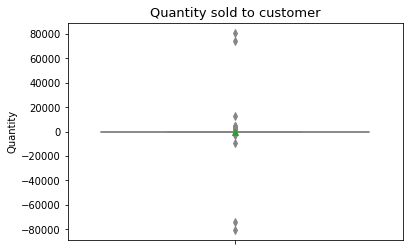

In [29]:
sns.boxplot(data_4["Quantity"], showmeans = True, color = "pink", orient="v")
plt.title("Quantity sold to customer",  fontsize = 13)

plt.show()

#### How to use this plot for multiple plots?
Want box plot for Quantity and Unit price

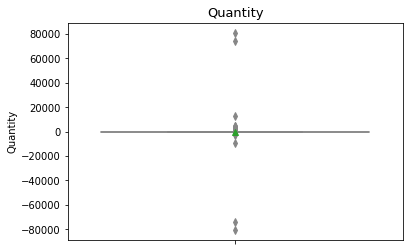

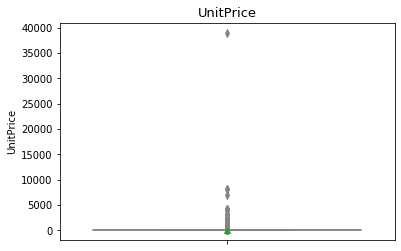

In [30]:
my_list = ["Quantity", "UnitPrice"]

for col in my_list:
    # One by one col goes in cols list (First: Quantity & then second: UnitPrice)
    sns.boxplot(data_4[col], showmeans = True, color = "pink", orient="v")
    plt.title(col,  fontsize = 13)
    plt.show()

### Insights: 
1. Negative quantity is canceled order - Do consider or not to consider?
2. Why Quantity and Unit Price is having outlier?

#### How much % of data is having negative quantity?

In [31]:
neg_qty = data_4[data_4["Quantity"] < 0]   # Negative qty df 
neg_perc = len(neg_qty)*100/len(data_4)    # Percentage formula
print ("% of data having negative quantity: {} %".format(round(neg_perc, 3)))   # print

% of data having negative quantity: 2.209 %


#### What if quantity was not negative and Invoice with "C" were considered as canceled?

In [32]:
cancel_qty = data_4[data_4["InvoiceNo"].astype(str).str.contains("C")]
cancel_perc = len(cancel_qty)*100/len(data_4)
print ("% of data having cancelled invoice: {}%".format(round(cancel_perc, 3)))

% of data having cancelled invoice: 2.209%


## Points Learnt: 
1. ID/Address/Name like columns should be a string (not float, int)
2. Convert multiple columns in required data type
3. Negative Qunatity means cancelled orders (Not considering for further analysis)
4. Select particular pattern in data string

In [33]:
data_5 = data_4[data_4["Quantity"] > 0]    # Positive Quantity 
data_6 = data_5[data_5["UnitPrice"] > 0]   # greater than 0 Cost 

## EDA Theory: 
1. Explore data with multiple questions
2. Create some assumptions and validate the same
3. Missing values treatment 
4. Check for anomalies in data - outlier detection
5. Anomalies to be treated with some transformation techniques and removal

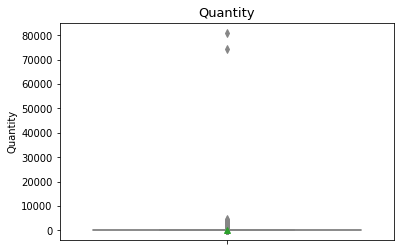

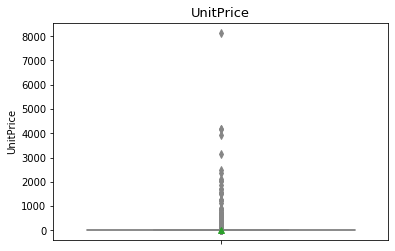

In [34]:
cols = ["Quantity", "UnitPrice"]   # Box [plot of Quantity & Unit Price]
for col in cols:
    sns.boxplot(data_6[col], showmeans = True, color = "pink", orient="v")
    plt.title(col,  fontsize = 13)
    plt.show()

### Insights: 
1. There are high quantity (>50000)
- Quantity high, can be high demand shoot up? New customer purschase?
2. Also high Unit Price (> 5000)
- What is so expensive?

In [35]:
data_6[data_6["UnitPrice"] > 5000]

InvoiceNo StockCode Description  Quantity         InvoiceDate  \
173382    551697      POST     POSTAGE         1 2011-05-03 13:46:00   

        UnitPrice CustomerID         Country  
173382    8142.75      16029  United Kingdom

##### How is the price of POST in complete 1 year?

In [36]:
data_check = data_6[data_6["StockCode"] == "POST"]
data_check

InvoiceNo StockCode Description  Quantity         InvoiceDate  \
45        536370      POST     POSTAGE         3 2010-12-01 08:45:00   
386       536403      POST     POSTAGE         1 2010-12-01 11:27:00   
1123      536527      POST     POSTAGE         1 2010-12-01 13:04:00   
5073      536840      POST     POSTAGE         1 2010-12-02 18:27:00   
5258      536852      POST     POSTAGE         1 2010-12-03 09:51:00   
...          ...       ...         ...       ...                 ...   
541198    581493      POST     POSTAGE         1 2011-12-09 10:10:00   
541216    581494      POST     POSTAGE         2 2011-12-09 10:13:00   
541730    581570      POST     POSTAGE         1 2011-12-09 11:59:00   
541767    581574      POST     POSTAGE         2 2011-12-09 12:09:00   
541768    581578      POST     POSTAGE         3 2011-12-09 12:16:00   

        UnitPrice CustomerID      Country  
45           18.0      12583       France  
386          15.0      12791  Netherlands  
1123         18.0      12662      Germany  
5073         18.0      12738      Germany  
5258         18.0      12686       France  
...           ...        ...          ...  
541198       15.0      12423      Belgium  
541216       18.0      12518      Germany  
541730       18.0      12662      Germany  
541767       18.0      12526      Germany  
541768       18.0      12713      Germany  

[1099 rows x 8 columns]

In [37]:
data_check["UnitPrice"].median()
# Mean = 31.5 & Median = 18

18.0

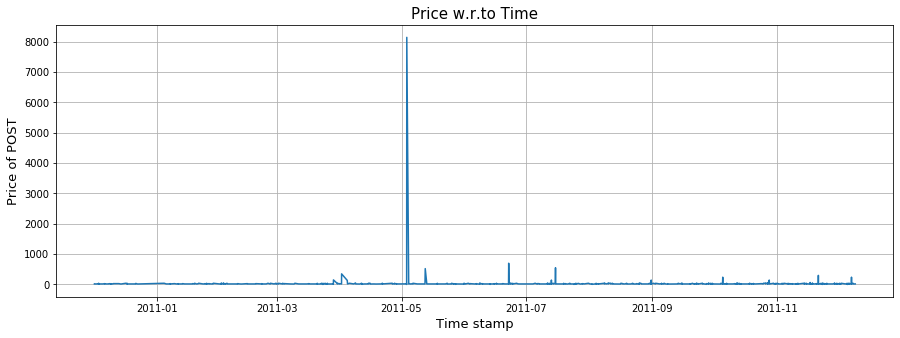

In [38]:
plt.figure(figsize = (15,5))                             # Plotting the graph of Unit Price
plt.plot(data_check["InvoiceDate"], data_check["UnitPrice"])
plt.xlabel("Time stamp", fontsize = 13)
plt.ylabel("Price of POST", fontsize = 13)
plt.title("Price w.r.to Time", fontsize = 15)
plt.grid()
plt.show()

### Insights: 
1. Opss!! thats a outlier. 
How we remove or manipulate?

In [39]:
data_6[(data_6["StockCode"] == "POST") & (data_6["CustomerID"] == "16029")]

InvoiceNo StockCode Description  Quantity         InvoiceDate  \
173382    551697      POST     POSTAGE         1 2011-05-03 13:46:00   

        UnitPrice CustomerID         Country  
173382    8142.75      16029  United Kingdom

In [40]:
data_check = data_6[(data_6["StockCode"] == "POST")]

data_7 = data_6.copy()

data_7["UnitPrice"] = np.where((data_7["UnitPrice"] > 2000) & (data_7["StockCode"] == "POST"),   # Condition
         data_check["UnitPrice"].median(),  # If condition is True
         data_7["UnitPrice"])  # If Condition is False

# numpy.where : if confusing please refer to:
# https://docs.scipy.org/doc/numpy/reference/generated/numpy.where.html

In [41]:
data_7[(data_7["StockCode"] == "POST") & (data_7["CustomerID"] == "16029")]

InvoiceNo StockCode Description  Quantity         InvoiceDate  \
173382    551697      POST     POSTAGE         1 2011-05-03 13:46:00   

        UnitPrice CustomerID         Country  
173382       18.0      16029  United Kingdom

In [42]:
# Similarly for Unit Price

# data_6["UnitPrice"].replace(data_6["UnitPrice"] >5000, data_check["UnitPrice"].median()) 

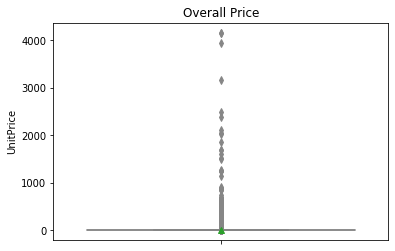

In [43]:
sns.boxplot(data_7["UnitPrice"], showmeans = True, color = "pink", orient="v")
plt.title("Overall Price")
plt.show()

## Points Learnt:
1. Check for anomalies
2. Anomalies treatment should be done at granular level else might lead to inconsistency

### How to create new columns using existing columns?
Amount = Quantity * Price

In [44]:
data_8 = data_7.copy()
data_8["Amount"] = data_8["Quantity"]*data_8["UnitPrice"]
data_8.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice CustomerID         Country  Amount  
0 2010-12-01 08:26:00       2.55      17850  United Kingdom   15.30  
1 2010-12-01 08:26:00       3.39      17850  United Kingdom   20.34  
2 2010-12-01 08:26:00       2.75      17850  United Kingdom   22.00  
3 2010-12-01 08:26:00       3.39      17850  United Kingdom   20.34  
4 2010-12-01 08:26:00       3.39      17850  United Kingdom   20.34

In [45]:
bar_df = pd.DataFrame(data_8.groupby(["Country"])["InvoiceNo"].nunique())
#bar_df = bar_df.reset_index()
bar_df.head()        # How many orders per country?

InvoiceNo
Country             
Australia         57
Austria           17
Bahrain            2
Belgium           98
Brazil             1

In [46]:
bar_df=bar_df.rename(columns = {"InvoiceNo":"newInvoiceNo"})
bar_df=bar_df.sort_values("newInvoiceNo",ascending=False)
bar_df.head()

newInvoiceNo
Country                     
United Kingdom         16646
Germany                  457
France                   389
EIRE                     260
Belgium                   98

#### What if I want to rename the column name?
ename and sort column in descending order

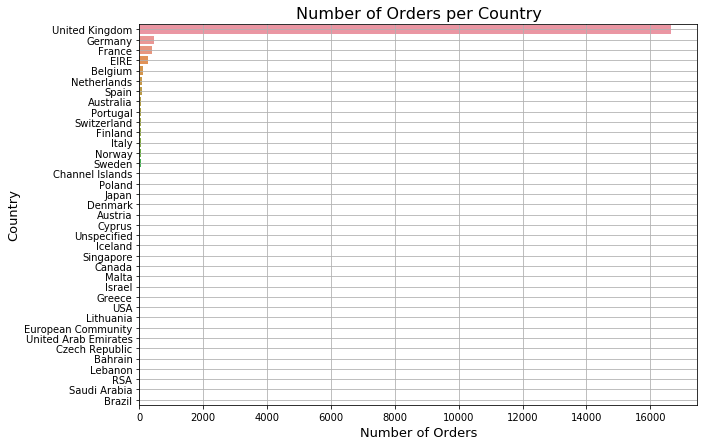

In [47]:
plt.figure(figsize = (10,7))
sns.barplot(x="newInvoiceNo", y=bar_df.index , data=bar_df)
plt.xlabel('Number of Orders',  fontsize = 13)
plt.ylabel('Country', fontsize = 13)
plt.title('Number of Orders per Country', fontsize=16)
plt.grid()
plt.show()